<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [42]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [43]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [44]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [45]:
boston_df=pd.read_csv(boston_url)
print(boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### Media Value of Owner Occupied homes

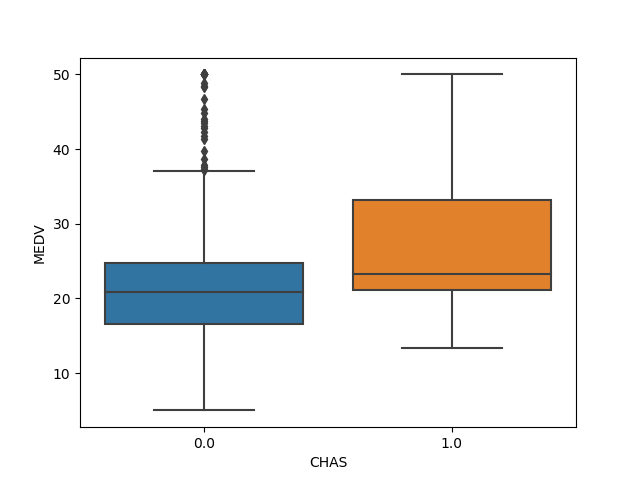

In [46]:
sns.boxplot(x='CHAS',y='MEDV', data=boston_df)
plt.show()

### Bar plot of Charles River Variable

In [50]:
chas_medv = boston_df.groupby('CHAS')[['MEDV']].median().reset_index()


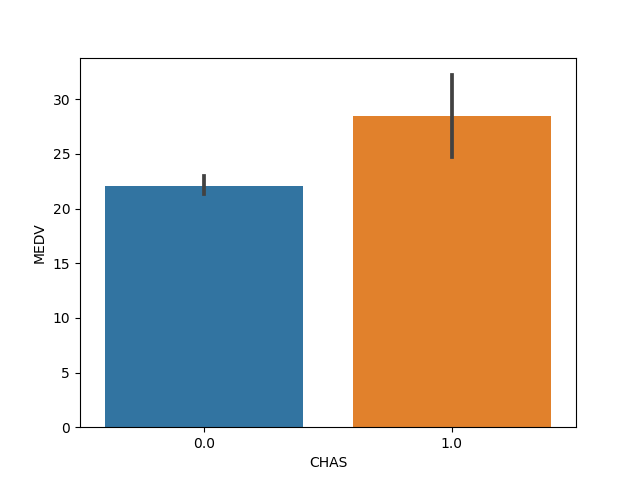

In [55]:
sns.barplot(x='CHAS',y='MEDV', data=boston_df)
plt.show()

### Age Groups with Box Plot

In [83]:
boston_df['Age Groups'] = pd.cut(boston_df.AGE, [0,35,75,1000],labels=['less_than_35', 'thirthyfive_to_75', 'OVer75'], include_lowest=True)
print(boston_df['Age Groups'])

0      thirthyfive_to_75
1                 OVer75
2      thirthyfive_to_75
3      thirthyfive_to_75
4      thirthyfive_to_75
             ...        
501    thirthyfive_to_75
502               OVer75
503               OVer75
504               OVer75
505               OVer75
Name: Age Groups, Length: 506, dtype: category
Categories (3, object): ['less_than_35' < 'thirthyfive_to_75' < 'OVer75']


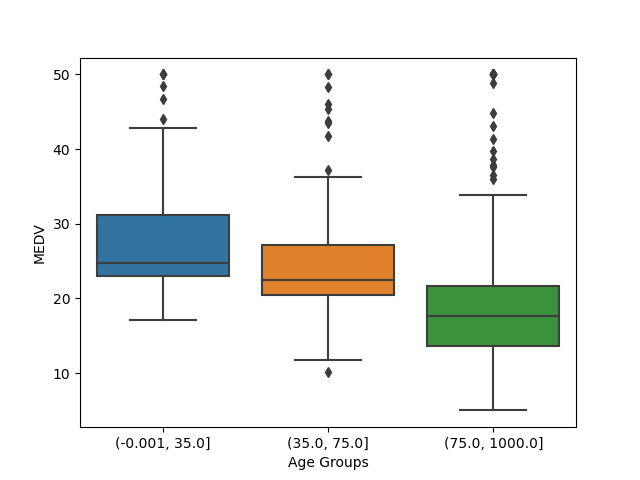

In [61]:
sns.boxplot(x='Age Groups',y='MEDV', data=boston_df)
plt.show()

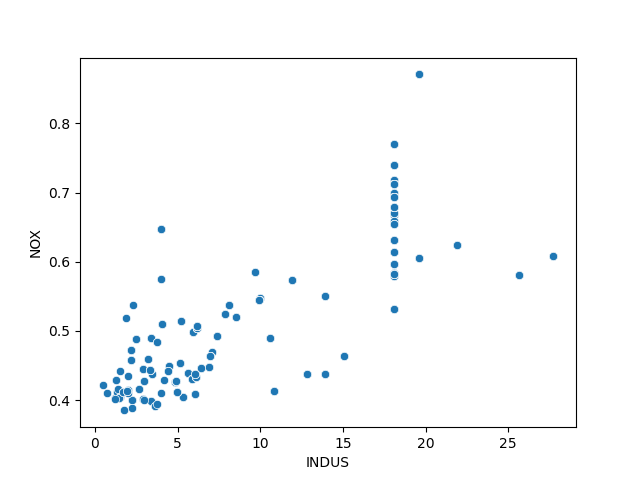

In [65]:
sns.scatterplot(x='INDUS',y='NOX', data=boston_df)
plt.show()

#### There is a positive correlation between INDUS and NOX

### Histogram of PTRATIO 

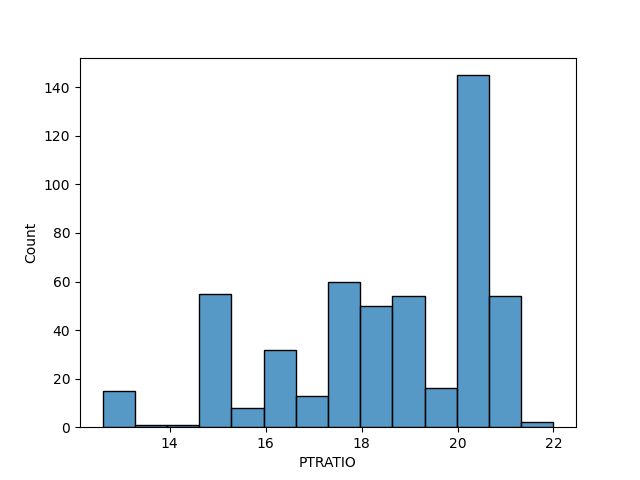

In [68]:
sns.histplot(data=boston_df, x="PTRATIO")
plt.show()

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


In [70]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

### Yes we  reject the null hypothesis

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [86]:
less_than_35 = boston_df[boston_df['Age Groups'] == 'less_than_35']['MEDV']
thirthyfive_to_75 = boston_df[boston_df['Age Groups'] == 'thirthyfive_to_75']['MEDV']
OVer75 =boston_df[boston_df['Age Groups'] == 'OVer75']['MEDV']

In [87]:

f_statistic, p_value = scipy.stats.f_oneway(less_than_35, thirthyfive_to_75, OVer75)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 40.06431640638432, P-Value: 7.155006254871619e-17


#### Yes we  reject the null hypothesis

# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)




State the hypothesis:

*   $H\_0:$ NOX evaluation score is not correlated with INDUS 
*   $H\_1:$ NOX evaluation score is correlated withINDUS 

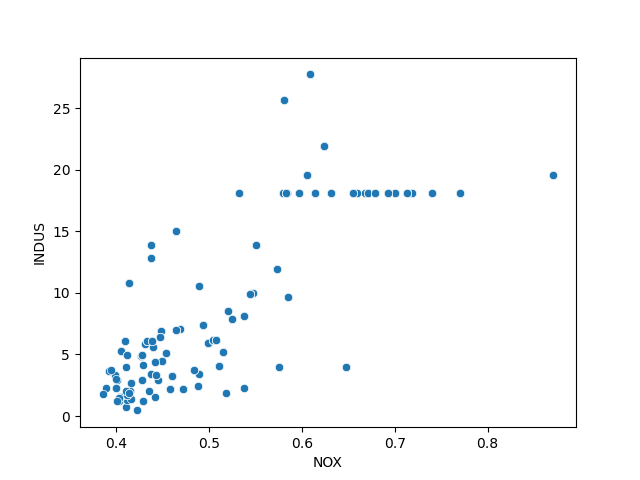

In [88]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
plt.show()

In [89]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209189, 7.913361061211254e-98)

### Yes we  reject the null hypothesis and there is a strong positive correlation

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [91]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        17:42:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The Median value goes up by 1.0916 for each distance from the five employment centers go up.